In [19]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
marks = np.random.randint(40, 95, 30)  # marks between 40 and 95
cgpa = np.round(np.random.uniform(5.5, 9.5, 30), 2)  # cgpa between 5.5 and 9.5

# Create placement status (simple rule-based: higher marks & cgpa -> placed)
placed = np.where((marks > 65) & (cgpa > 7.0), 1, 0)

# Create DataFrame
df = pd.DataFrame({
    "Marks": marks,
    "CGPA": cgpa,
    "Placed": placed
})

print("Original Data:")
print(df.head())



Original Data:
   Marks  CGPA  Placed
0     78  5.53       0
1     91  5.59       0
2     68  7.60       1
3     54  7.10       0
4     82  5.69       0


In [4]:
X = df[['Marks','CGPA']]
y = df['Placed']

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


In [8]:
df_X_train_scale = pd.DataFrame(X_train_scale,columns=X_train.columns, index=X_train.index)

In [10]:
from sklearn.svm import SVC
model = SVC(kernel='poly')
model.fit(X_train_scale,y_train)

SVC(kernel='poly')

In [13]:
round(model.score(X_train_scale,y_train),2)*100

92.0

In [14]:
round(model.score(X_test_scale,y_test),2)*100

83.0

<h3>Decision Boundary</h3>

In [15]:
from mlxtend.plotting import plot_decision_regions

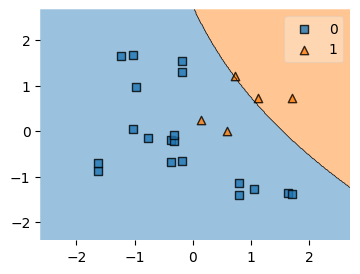

In [21]:
plt.figure(figsize=(4,3))
plot_decision_regions(df_X_train_scale.to_numpy(),y_train.to_numpy(),clf=model)
plt.show()

<h3>This is how our points look </h3>

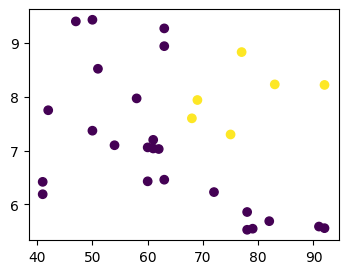

In [25]:
plt.figure(figsize=(4,3))
plt.scatter(df['Marks'],df['CGPA'],c=df['Placed'])